## Importing Libraries

In [10]:
# import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
# from stock_download_pipeline.ipynb import *

## Defining Functions

In [2]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
def read_data(company, previous_days, holidays_list_path = False):

    company_prices, company_valuation = YahooFinanceHistory(company, previous_days)
    company_prices = company_prices[['Date', 'Close']]
    company_prices.columns = ['ds', 'y']
    company_prices['ds'] = pd.to_datetime(company_prices['ds'])

    if holidays_list_path.endswith == '.xls':
        holidays_list = pd.read_excel(holidays_list_path)

    elif holidays_list_path.endswith == '.csv':
        holidays_list = pd.read_csv(holidays_list_path)

    elif holidays_list_path.endswith == '.xlsx':
        holidays_list = pd.read_excel(holidays_list_path)

    else:
        print('File type not supported')

    for i in range(len(holidays_list['Day'])):
        holidays_list['Day'][i] = pd.to_datetime(parse(holidays_list['Day'][i]))

    holidays_list = holidays_list[['Holiday','Day']]
    holidays_list = holidays_list.rename({'Day':'ds', 'Holiday':'holiday'}, axis = 1)   

    return company_prices, holidays_list

## Defining hyper parameters

In [8]:
h = 5                           # prediction for H days
train_size = 247*4              # Use 4 years of data as train set. Note there are about 252 trading days in a year
val_size = 246                  # Use 1 year of data as validation set
train_val_size = train_size + val_size
print(train_val_size)

1234


In [ ]:
company_prices, holidays_list = read_data('RELIANCE.NS', 365*5, holidays_list_path = '/content/2017_Holidays_NSE_BSE_EQ_EQD.csv')

In [22]:
m = Prophet(growth = 'linear',holidays = holidays_list)

In [23]:
model = m.fit(company_prices[0:247*4])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_dates = model.make_future_dataframe(periods = 2*h)

In [27]:
future_dates['day'] = future_dates['ds'].dt.weekday
future_dates = future_dates[future_dates['day']<=4]

In [28]:
prediction = model.predict(future_dates)

In [34]:
pred = model.predict(company_prices[(247*4+1):])

In [52]:
print('The MAPE for Test values(Last 1 year) and Predicted values(Last 1 year): %d%%' %get_mape(company_prices[(247*4+1):]['y'], pred['yhat']))

The MAPE for Test values(Last 1 year) and Predicted values(Last 1 year): 14%


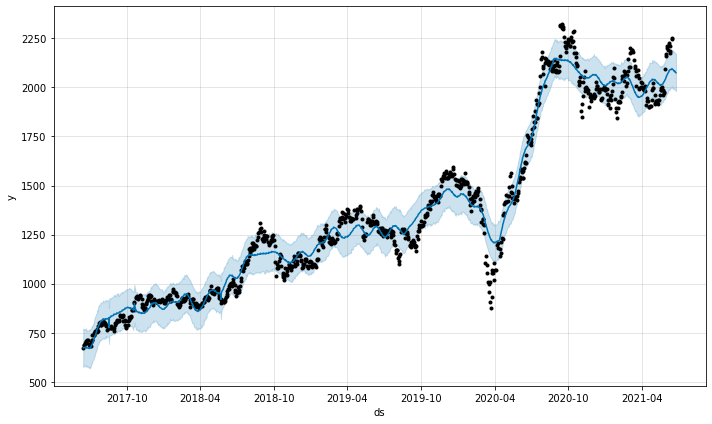

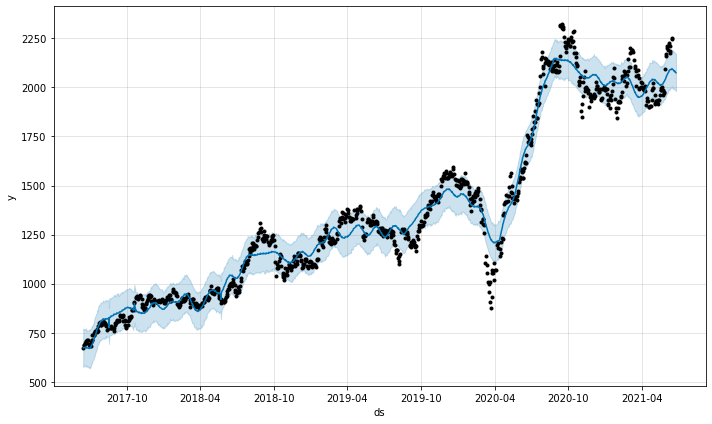

In [31]:
model.plot(prediction)

In [ ]:
df_cv = cross_validation(model, initial = '989 days', period = '2 days', horizon = '5 days')

INFO:fbprophet:Making 235 forecasts with cutoffs between 2020-02-28 00:00:00 and 2021-06-10 00:00:00


  0%|          | 0/235 [00:00<?, ?it/s]

In [154]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,28724.913855,169.484258,127.232932,0.058063,0.042130,0.582090
1,11 days,30404.376160,174.368507,129.023001,0.058418,0.039621,0.582090
2,12 days,28764.473345,169.600924,122.225371,0.055305,0.032242,0.611940
3,13 days,26719.270834,163.460304,116.255683,0.052519,0.032242,0.628998
4,14 days,26701.557964,163.406114,115.417018,0.052447,0.032198,0.611940
...,...,...,...,...,...,...,...
86,96 days,56409.328363,237.506481,201.490976,0.084686,0.083177,0.304104
87,97 days,55252.701265,235.058931,197.109835,0.082655,0.086317,0.332623
88,98 days,54398.174607,233.234163,195.715792,0.082498,0.083177,0.343284
89,99 days,53410.233617,231.106542,196.995113,0.083792,0.083177,0.321962


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


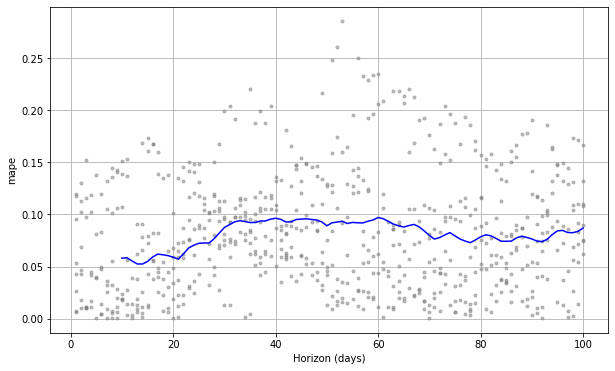

In [155]:
fig = plot_cross_validation_metric(df_cv, metric = 'mape')